In [ ]:
####################################################################################
# THE RESULTS:
# The best is MODEL 2: L1 Regularization (Lasso regression)for Linear Regression with Polynomial Features
# degree 3 and alpha 0.1
# Training MSE: 2.6626483500226863
# Testing MSE:  2.976122056422494

# The results of permutation feature importance indicate the relative importance of each feature in predicting 
# the price of an offroad car.A negative R2 score of -0.304, indicates that the regression model is not a good 
# fit for the data and performs worse than a model that simply predicts the mean value of the dependent variable.
# The "transmission_other 4.159 +/- 1.111" means that this feature has an importance score of 4.159, with a 
# standard deviation of 1.111. This suggests that the "transmission_other" feature has a relatively high 
# importance in the model's performance.
####################################################################################

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
import numpy as np
import plotly.express as px
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn import set_config
set_config(display="diagram")
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE

In [2]:
df_offroad_all= pd.read_csv('/Users/chameleonjj/Downloads/ASSIGNMENT 11/Data/df_offroad.csv')

In [3]:
df_offroad_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        384 non-null    object 
 1   price         384 non-null    int64  
 2   manufacturer  384 non-null    object 
 3   condition     376 non-null    object 
 4   cylinders     370 non-null    object 
 5   fuel          384 non-null    object 
 6   odometer      378 non-null    float64
 7   title_status  384 non-null    object 
 8   transmission  384 non-null    object 
 9   drive         373 non-null    object 
 10  type          384 non-null    object 
 11  paint_color   365 non-null    object 
 12  state         384 non-null    object 
 13  age           384 non-null    float64
dtypes: float64(2), int64(1), object(11)
memory usage: 42.1+ KB


In [4]:
df_offroad_all.head()

,region,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,age
0,auburn,17500,toyota,good,6 cylinders,gas,201300.0,clean,manual,4wd,offroad,black,al,14.0
1,birmingham,17999,jeep,excellent,6 cylinders,gas,125000.0,clean,automatic,4wd,offroad,black,al,10.0
2,huntsville / decatur,13500,jeep,good,6 cylinders,gas,199000.0,clean,manual,4wd,offroad,green,al,18.0
3,anchorage / mat-su,27995,jeep,like new,4 cylinders,gas,27679.0,clean,automatic,4wd,offroad,white,ak,5.0
4,anchorage / mat-su,39995,jeep,like new,6 cylinders,gas,29470.0,clean,manual,4wd,offroad,red,ak,6.0


In [5]:
# We no longer need column 'type' (all values same)
df_offroad_all = df_offroad_all.drop('type', axis=1)

In [6]:
# Creating a data 'df_antiques' for columns describing the car condition.
df_offroad = df_offroad_all.drop(['region', 'state'], axis=1)

In [7]:
# Checking for missing values 
missing_values_count = df_offroad.isna().sum()
print(missing_values_count)

price            0
manufacturer     0
condition        8
cylinders       14
fuel             0
odometer         6
title_status     0
transmission     0
drive           11
paint_color     19
age              0
dtype: int64


In [8]:
### Since there is a large pool of data available in each column I decided to replace NaN values proportionately 
### Calculating percentage of each value in 'condition'
cond_pct = df_offroad['condition'].value_counts(normalize=True)
### Filling NaN values in 'condition' column with percentages
df_offroad.loc[:, 'condition'] = df_offroad['condition'].apply(lambda x: np.random.choice(cond_pct.index, p=cond_pct.values) if pd.isna(x) else x)

### Calculating percentage of each value in 'cylinders'
cond_pct = df_offroad['cylinders'].value_counts(normalize=True)
### Filling NaN values in 'cylinders' column with percentages
df_offroad.loc[:, 'cylinders'] = df_offroad['cylinders'].apply(lambda x: np.random.choice(cond_pct.index, p=cond_pct.values) if pd.isna(x) else x)

### Calculating percentage of each value in 'drive'
cond_pct = df_offroad['drive'].value_counts(normalize=True)
### Filling NaN values in 'drive' column with percentages
df_offroad.loc[:, 'drive'] = df_offroad['drive'].apply(lambda x: np.random.choice(cond_pct.index, p=cond_pct.values) if pd.isna(x) else x)

### Calculating percentage of each value in 'paint_color'
cond_pct = df_offroad['paint_color'].value_counts(normalize=True)
### Filling NaN values in 'paint_color' column with percentages
df_offroad.loc[:, 'paint_color'] = df_offroad['paint_color'].apply(lambda x: np.random.choice(cond_pct.index, p=cond_pct.values) if pd.isna(x) else x)


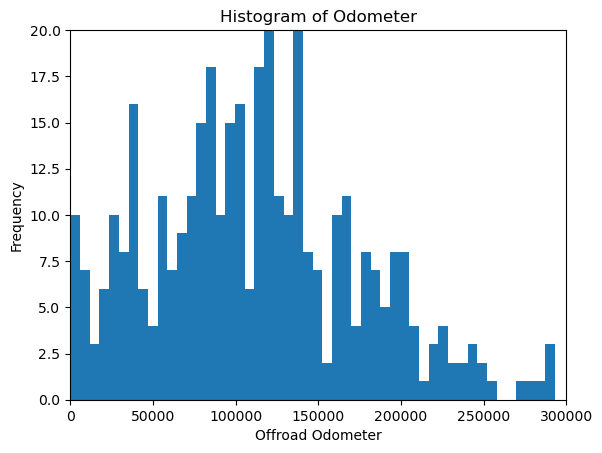

In [9]:
###COLUMN: 'ODOMETER'
### I am checking the distribution of the data for column 'odometer' to decide to how to fill NaN values
### ploting histogram
plt.hist(df_offroad['odometer'], bins=50)
plt.xlabel('Offroad Odometer')
plt.ylabel('Frequency')
plt.title('Histogram of Odometer')
plt.ylim(top=20)
plt.xlim(left=0, right=300000)
plt.show()

In [10]:
###COLUMN: 'ODOMETER' CONTINUED
### since the distribution of the data is not symmetrical, I will use median to replace NaN values.
### Calculating the median value of the non-missing values
median_odometer = df_offroad['odometer'].median()

### Replacing the missing values with the median
df_offroad['odometer'] = df_offroad['odometer'].fillna(median_odometer)

In [11]:
# Checking for missing values 
missing_values_count = df_offroad.isna().sum()
print(missing_values_count)

price           0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
paint_color     0
age             0
dtype: int64


In [12]:
# Applying the ordinal encoding to the 'condition' column
print(df_offroad['condition'].unique())

['good' 'excellent' 'like new' 'salvage' 'new' 'fair']


In [13]:
# Applying the ordinal encoding to the 'condition' column
encoder = OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'like new', 'new', 'excellent']])
df_offroad['condition_encoded'] = encoder.fit_transform(df_offroad[['condition']])

# Droping the original 'condition' column
df_offroad.drop('condition', axis=1, inplace=True)

In [14]:
# Applying the ordinal encoding to the 'title_status' column
print(df_offroad['title_status'].unique())

['clean' 'salvage' 'lien' 'missing' 'parts only' 'rebuilt']


In [15]:
# Applying the ordinal encoding to the 'title_status' column
encoder = OrdinalEncoder(categories=[['parts only', 'salvage', 'rebuilt', 'missing', 'lien', 'clean']])
df_offroad['title_status'] = encoder.fit_transform(df_offroad[['title_status']])

# Droping the original 'condition' column
df_offroad.drop('title_status', axis=1, inplace=True)

In [16]:
#Applying OHE

# Selecting non-numeric columns
non_numeric_columns = df_offroad.select_dtypes(exclude='number').columns

# Applying one-hot encoding to non-numeric columns and concatenate with the original dataframe
df_encoded = pd.get_dummies(df_offroad, columns=non_numeric_columns, drop_first=False)

# Printing the new encoded DataFrame
df_encoded.head()


,price,odometer,age,condition_encoded,manufacturer_NA manufacturer,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,17500,201300.0,14.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17999,125000.0,10.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13500,199000.0,18.0,2.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,27995,27679.0,5.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,39995,29470.0,6.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


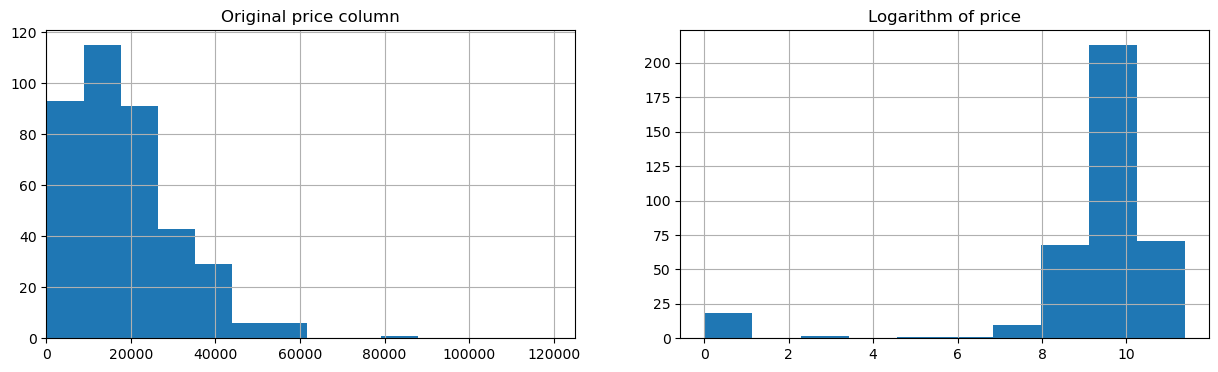

In [17]:
# Creating histograms of price column and the logarithm of the price column to visually compare the two distributions
# and to decide which one is more suitable for the machine learning model.
fig, ax = plt.subplots(1, 2, figsize = (15, 4))
ax[0].hist(df_encoded['price'])
ax[0].set_xlim([0,125000])
ax[0].grid()
ax[0].set_title('Original price column')
ax[1].hist(np.log1p(df_encoded['price']))
ax[1].grid()
ax[1].set_title('Logarithm of price');

In [18]:
# I will be using the logarithm of price for the ML model. Taking the logarithm of the price column can help to 
# make the distribution more symmetric. This can be useful in my ML model since it assumes normality of the price.

In [19]:
#Splitting the data frame with a Logarythmic target
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('price', axis = 1), np.log1p(df_encoded.price), 
                                                   random_state=42, test_size = 0.3)

print(X_train.shape)
print(X_test.shape)

(268, 49)
(116, 49)


In [20]:
#Scaling the data with a StandardScaler to:
# * avoid bias towards features with larger values
# * improve numerical stability:
# * reduce the impact of outliers
# * enable efficient use of resources
scaler = StandardScaler()
df_encoded_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

In [21]:
# Before building a regression model, I set a baseline to compare my models to.
baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()
mse_baseline_train = mean_squared_error(baseline_train, y_train)
mse_baseline_test = mean_squared_error(baseline_test, y_test)

print(baseline_train.shape, baseline_test.shape)
print(f'Baseline for training data: {mse_baseline_train}')
print(f'Baseline for testing data: {mse_baseline_test}')

(268,) (116,)
Baseline for training data: 5.737093646176385
Baseline for testing data: 2.9850902787594324


In [22]:
# MODEL 1: No regularization: Linear Regression with Polynomial Features 
train_mses = []
test_mses = []
#for degree in 1 - 4
for i in range(1, 5):
    print(f'Running iteration {i}...')
    #create pipeline with PolynomialFeatures degree i
    poly = make_column_transformer((PolynomialFeatures(degree=i), make_column_selector(dtype_include=np.number)))
    pipe = Pipeline([('transformer', poly), ('linreg', LinearRegression())])

    pipe.fit(X_train, y_train)
    #fit on train
    p1 = pipe.predict(X_train)
    p2 = pipe.predict(X_test)
    #predict on train and test
    train_mses.append(mean_squared_error(y_train, p1))
    test_mses.append(mean_squared_error(y_test, p2))
# Answer check
print(train_mses)
print(test_mses)
pipe

Running iteration 1...
Running iteration 2...
Running iteration 3...
Running iteration 4...
[4.189133150873139, 1.7980509189106175, 1.328670107407936, 2.2525356360968574]
[3.4990109162201795, 27187.233069782444, 59985754.51423801, 54718.94260582562]


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('polynomialfeatures',
                                                  PolynomialFeatures(degree=4),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc1b8127790>)])),
                ('linreg', LinearRegression())])

In [23]:
# # MODEL 1: No regularization: Linear Regression with Polynomial Features results
# The best is Linear Regression model with Polynomial Features degree 1 because it produces the lowest testing MSE:
# Training MSE: 4.189133150873139
# Testing MSE: 3.4990109162201795
# This model compered to baseline model didn't perform well.

In [24]:
# MODEL 2: L1 Regularization (Lasso regression)for Linear Regression with Polynomial Features

# Defining polynomial degrees and a range of alpha values to test
degrees = [1, 2, 3, 4]
alphas = [0.1, 0.5, 1, 5, 10]

# Defining pipeline for polynomial feature generation, scaling, and Lasso regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(alphas=alphas, cv=5))
])

# Defining parameter grid for polynomial degree and alpha
param_grid = {
    'poly__degree': degrees,
    'lasso__cv': [5],
    'lasso__n_alphas': [100],
    'lasso__tol': [0.0001],
    'lasso__max_iter': [1000],
    'lasso__random_state': [42]
}

# Performing grid search to find best degree and alpha
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Printing best degree, alpha, and corresponding mean squared error
best_degree = grid_search.best_params_['poly__degree']
best_alpha = grid_search.best_estimator_.named_steps['lasso'].alpha_
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Best degree: {best_degree}, Best alpha: {best_alpha}, Training MSE: {mse_train}')
print(f'Best degree: {best_degree}, Best alpha: {best_alpha}, Testing MSE: {mse_test}')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.149e-01, tolerance: 9.645e-02
  model = cd_fast.enet_coordinate_descent(


Best degree: 3, Best alpha: 0.1, Training MSE: 2.6626483500226863
Best degree: 3, Best alpha: 0.1, Testing MSE: 2.976122056422494


In [25]:
# MODEL 3: L2 regularization (Ridge regression) for Linear Regression with Polynomial Features 

# Defining polynomial degrees and a range of alpha values to test
degrees = [1, 2, 3, 4]
alphas = [0.01, 0.1, 1, 10, 100]

# Defining pipeline for polynomial feature generation, scaling, and Ridge regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Defining parameter grid for polynomial degree and alpha
param_grid = {
    'poly__degree': degrees,
    'ridge__alpha': alphas
}

# Performing grid search to find best degree and alpha
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Printing best degree, alpha, and corresponding mean squared error
best_degree = grid_search.best_params_['poly__degree']
best_alpha = grid_search.best_params_['ridge__alpha']
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Best degree: {best_degree}, Best alpha: {best_alpha}, Training data MSE: {mse_train}, Testing data MSE: {mse_test}')


Best degree: 2, Best alpha: 100, Training data MSE: 2.6814836694709046, Testing data MSE: 3.345018577691934


In [26]:
# Now I will run all models through SFS and RFE to hopefully get even better model

In [27]:
#SFS

In [28]:
# MODEL 4: Linear Regression with Polynomial Features degree 1
from sklearn.model_selection import GridSearchCV

# Defining the pipeline with polynomial features and Linear Regression
degree = 1

pipe = make_pipeline(
    SequentialFeatureSelector(LinearRegression(), n_features_to_select=None, cv=None),
    PolynomialFeatures(degree=degree, include_bias=False),
    StandardScaler(),
    LinearRegression())

# Defining the range of hyperparameters to search over
param_grid = {'sequentialfeatureselector__n_features_to_select': [2, 3, 4, 5, 6, 7, 8]}

# Defining the grid search with the pipeline and the hyperparameter grid
grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fitting the grid search on the training data
grid_search.fit(X_train, y_train)

# Retrievv the best hyperparameter
best_n_features = grid_search.best_params_['sequentialfeatureselector__n_features_to_select']

# Fitting the Sequential Forward Selector with the best hyperparameter
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=best_n_features, cv=5)

# Fitting the SFS model on the training data and retrieve the selected feature indices
sfs.fit(X_train, y_train)
selected_feature_indices = sfs.get_support(indices=True)

# Selecting the training and test data for the selected features
selected_columns = X_train.columns[selected_feature_indices]
if all(col in X_train.columns for col in selected_columns):
    X_train_selected = X_train.loc[:, selected_columns]
    X_test_selected = X_test.loc[:, selected_columns]

# Fitting the pipeline with polynomial features and Linear Regression on the selected features 
pipe_selected = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                              StandardScaler(),
                              LinearRegression())
pipe_selected.fit(X_train_selected, y_train)
y_train_pred = pipe_selected.predict(X_train_selected)
y_test_pred = pipe_selected.predict(X_test_selected)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Printing the selected feature indices and the corresponding names
print("Selected Feature Indices:", selected_feature_indices)
print("Selected Feature Names:", selected_columns)

# Printing the training and test MSE
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")


Selected Feature Indices: [ 4 17 30 31 37 45]
Selected Feature Names: Index(['manufacturer_chevrolet', 'manufacturer_ram', 'fuel_other',
       'transmission_automatic', 'paint_color_black', 'paint_color_red'],
      dtype='object')
Training MSE: 4.6160
Testing MSE: 3.0577


In [29]:
# MODEL 5: Lasso regression for Linear Regression with Polynomial Features degree 3 and alpha 0.1
from sklearn.linear_model import Lasso

# Defining the pipeline with polynomial features and Lasso Regression
degree = 3
alpha = 0.1

pipe = make_pipeline(
    SequentialFeatureSelector(Lasso(alpha=alpha), n_features_to_select=None, cv=None),
    PolynomialFeatures(degree=degree, include_bias=False),
    StandardScaler(),
    Lasso(alpha=alpha))

# Defining the range of hyperparameters to search over
param_grid = {'sequentialfeatureselector__n_features_to_select': [2, 3, 4, 5, 6, 7, 8]}

# Defining the grid search with the pipeline and the hyperparameter grid
grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fitting the grid search on the training data
grid_search.fit(X_train, y_train)

# Retrieving the best hyperparameter
best_n_features = grid_search.best_params_['sequentialfeatureselector__n_features_to_select']

# Fitting the Sequential Forward Selector with the best hyperparameter
sfs = SequentialFeatureSelector(Lasso(alpha=alpha), n_features_to_select=best_n_features, cv=5)

# Fitting the SFS model on the training data and retrieve the selected feature indices
sfs.fit(X_train, y_train)
selected_feature_indices = sfs.get_support(indices=True)

# Selectv the training and test data for the selected features
selected_columns = X_train.columns[selected_feature_indices]
if all(col in X_train.columns for col in selected_columns):
    X_train_selected = X_train.loc[:, selected_columns]
    X_test_selected = X_test.loc[:, selected_columns]

# Fitting the pipeline with polynomial features and Lasso Regression on the selected features 
pipe_selected = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                              StandardScaler(),
                              Lasso(alpha=alpha))
pipe_selected.fit(X_train_selected, y_train)
y_train_pred = pipe_selected.predict(X_train_selected)
y_test_pred = pipe_selected.predict(X_test_selected)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Printing the selected feature indices and the corresponding names
print("Selected Feature Indices:", selected_feature_indices)
print("Selected Feature Names:", selected_columns)

# Printing the training and test MSE
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")


Selected Feature Indices: [ 1  3 12 37 46]
Selected Feature Names: Index(['age', 'manufacturer_NA manufacturer', 'manufacturer_jeep',
       'paint_color_black', 'paint_color_silver'],
      dtype='object')
Training MSE: 4.9864
Testing MSE: 3.4072


In [30]:
# MODEL 6: L2 regularization (Ridge regression) for Linear Regression with Polynomial Features degree 2 and alpha 100
from sklearn.linear_model import Ridge

# Defining the pipeline with polynomial features and Ridge Regression
degree = 2
alpha = 100

pipe = make_pipeline(
    SequentialFeatureSelector(Ridge(alpha=alpha), n_features_to_select=None, cv=None),
    PolynomialFeatures(degree=degree, include_bias=False),
    StandardScaler(),
    Ridge(alpha=alpha))

# Defining the range of hyperparameters to search over
param_grid = {'sequentialfeatureselector__n_features_to_select': [2, 3, 4, 5, 6, 7, 8]}

# Defining the grid search with the pipeline and the hyperparameter grid
grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fitting the grid search on the training data
grid_search.fit(X_train, y_train)

# Retrieving the best hyperparameter
best_n_features = grid_search.best_params_['sequentialfeatureselector__n_features_to_select']

# Fitting the Sequential Forward Selector with the best hyperparameter
sfs = SequentialFeatureSelector(Ridge(alpha=alpha), n_features_to_select=best_n_features, cv=5)

# Fitting the SFS model on the training data and retrieve the selected feature indices
sfs.fit(X_train, y_train)
selected_feature_indices = sfs.get_support(indices=True)

# Selecting the training and test data for the selected features
selected_columns = X_train.columns[selected_feature_indices]
if all(col in X_train.columns for col in selected_columns):
    X_train_selected = X_train.loc[:, selected_columns]
    X_test_selected = X_test.loc[:, selected_columns]

# Fitting the pipeline with polynomial features and Ridge Regression on the selected features 
pipe_selected = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                              StandardScaler(),
                              Ridge(alpha=alpha))
pipe_selected.fit(X_train_selected, y_train)
y_train_pred = pipe_selected.predict(X_train_selected)
y_test_pred = pipe_selected.predict(X_test_selected)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

import copy

#Saving this incase it is the best model.
sfs_ridge_pipe = copy.deepcopy(pipe_selected)

sfs_x_selected = copy.deepcopy(X_test_selected)

# Printing the selected feature indices and the corresponding names
print("Selected Feature Indices:", selected_feature_indices)
print("Selected Feature Names:", selected_columns)

# Printing the training and test MSE
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")


Selected Feature Indices: [ 4 12 25 30 31 37 45 46]
Selected Feature Names: Index(['manufacturer_chevrolet', 'manufacturer_jeep', 'cylinders_6 cylinders',
       'fuel_other', 'transmission_automatic', 'paint_color_black',
       'paint_color_red', 'paint_color_silver'],
      dtype='object')
Training MSE: 4.2439
Testing MSE: 3.1109


In [31]:
#RFE

In [32]:
#MODEL 7: No regularization: Linear Regression with Polynomial Features degree 1 run through RFE.
# Define the pipeline with polynomial features, RFE selector, and Linear Regression

# Defining the pipeline with polynomial features, RFE selector, and Linear Regression
degree = 1
pipe = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                     StandardScaler(),
                     RFE(LinearRegression()))

# Defining the range of hyperparameters to search over
param_grid = {'rfe__n_features_to_select': [2, 3, 4, 5, 6, 7, 8]}

# Defining the grid search with the pipeline and the hyperparameter grid
grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fitting the grid search on the training data
grid_search.fit(X_train, y_train)

# Retrieving the best hyperparameter
best_n_features = grid_search.best_params_['rfe__n_features_to_select']

# Geting the PolynomialFeatures object from the pipeline
poly = pipe.named_steps['polynomialfeatures']

# Fitting and transform the training data to include polynomial features
poly.fit(X_train)
X_train_poly = poly.transform(X_train)

# Geting the names of the polynomial features
train_poly_feature_names = poly.get_feature_names_out(input_features=X_train.columns)

# Converting the transformed data back to a Pandas DataFrame and set the column names
X_train_poly = pd.DataFrame(X_train_poly, columns=train_poly_feature_names)

# Transforming the test data to include polynomial features
X_test_poly = poly.transform(X_test)

# Geting the names of the polynomial features
test_poly_feature_names = poly.get_feature_names_out(input_features=X_test.columns)

# Converting the transformed data back to a Pandas DataFrame and set the column names
X_test_poly = pd.DataFrame(X_test_poly, columns=test_poly_feature_names)

# Fitting the RFE selector with the best hyperparameter
rfe = RFE(LinearRegression(), n_features_to_select=best_n_features)
pipe.steps[2] = ('rfe', rfe)
pipe.fit(X_train_poly, y_train)

# Retrieving the selected feature indices
selected_feature_indices = rfe.get_support(indices=True)

# Selecting the training and test data for the selected features
selected_columns = X_train_poly.columns[selected_feature_indices]
if all(col in X_train_poly.columns for col in selected_columns):
    X_train_selected = X_train_poly.loc[:, selected_columns]
    X_test_selected = X_test_poly.loc[:, selected_columns]
else:
    raise ValueError("Selected columns not present in the training data")

# Fitting the pipeline with polynomial features and Linear Regression on the selected features 
pipe_selected = make_pipeline(StandardScaler(),
                              LinearRegression())
pipe_selected.fit(X_train_selected, y_train)
y_train_pred = pipe_selected.predict(X_train_selected)
y_test_pred = pipe_selected.predict(X_test_selected)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Printing the selected feature indices and the corresponding names
print("Selected Feature Indices:", selected_feature_indices)
print("Selected Feature Names:", selected_columns)

# Printing the training and test MSE
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

Selected Feature Indices: [25 26 27 28 30 36]
Selected Feature Names: Index(['cylinders_6 cylinders', 'cylinders_8 cylinders', 'cylinders_other',
       'fuel_diesel', 'fuel_other', 'drive_rwd'],
      dtype='object')
Training MSE: 5.0643
Testing MSE: 3.1851


In [ ]:
# THIS MODEL TOOK TO LONG TO RUN ON MY COMPUTER... HENCE I WILL EXLUDE IT FROM MY CONSIDERATION
# MODEL 8: Lasso regression for Linear Regression with Polynomial Features degree 3 and alpha 0.1
degree = 3
alpha = 0.1

# Defining the pipeline with RFE and Lasso regression
pipe = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                     StandardScaler(),
                     RFE(Lasso(alpha=alpha)),
                     Lasso(alpha=alpha))

# Defining the range of hyperparameters to search over
param_grid = {'rfe__n_features_to_select': [2, 3, 4, 5]}

# Defining the grid search with the pipeline and the hyperparameter grid
grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fitting the grid search on the training data
grid_search.fit(X_train, y_train)

# Retrieving the best hyperparameter
best_n_features = grid_search.best_params_['rfe__n_features_to_select']

# Fitting the RFE selector with the best hyperparameter
rfe = RFE(Lasso(alpha=alpha), n_features_to_select=best_n_features)
pipe.steps[2] = ('rfe', rfe)
pipe.steps[3] = ('lasso', Lasso(alpha=alpha))
pipe.fit(X_train, y_train)

# Retrieving the selected feature indices
selected_feature_indices = rfe.get_support(indices=True)

# Geting the PolynomialFeatures object from the pipeline
poly = pipe.named_steps['polynomialfeatures']

# Using the PolynomialFeatures object to transform the data to include polynomial features
X_train_poly = poly.transform(X_train)

# Geting the names of the polynomial features
train_poly_feature_names = poly.get_feature_names_out(input_features=X_train.columns)

# Converting the transformed data back to a Pandas DataFrame and set the column names
X_train_poly = pd.DataFrame(X_train_poly, columns=train_poly_feature_names)


# Using the PolynomialFeatures object to transform the data to include polynomial features
X_test_poly = poly.transform(X_test)

# Geting the names of the polynomial features
test_poly_feature_names = poly.get_feature_names_out(input_features=X_test.columns)

# Converting the transformed data back to a Pandas DataFrame and set the column names
X_test_poly = pd.DataFrame(X_test_poly, columns=test_poly_feature_names)

# Selecting the training and test data for the selected features
selected_columns = X_train_poly.columns[selected_feature_indices]
if all(col in X_train_poly.columns for col in selected_columns):
    X_train_selected = X_train_poly.loc[:, selected_columns]
    X_test_selected = X_test_poly.loc[:, selected_columns]
else:
    raise ValueError("Selected columns not present in the training data")

# Fiting the pipeline with polynomial features and Lasso Regression on the selected features 
pipe_selected = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                              StandardScaler(),
                              Lasso (alpha=100))
pipe_selected.fit(X_train_selected, y_train)
y_train_pred = pipe_selected.predict(X_train_selected)
y_test_pred = pipe_selected.predict(X_test_selected)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Printing the selected feature indices and the corresponding names
print("Selected Feature Indices:", selected_feature_indices)
print("Selected Feature Names:", selected_columns)

# Printing the training and test MSE
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")


In [ ]:
# THIS MODEL TOOK TO LONG TO RUN ON MY COMPUTER... HENCE I WILL EXLUDE IT FROM MY CONSIDERATION
# MODEL 9: L2 regularization (Ridge regression) for Linear Regression with Polynomial Features degree 2 and alpha 100
degree = 2
alpha = 100

# Defining the pipeline with RFE and Ridge regression
pipe = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                     StandardScaler(),
                     RFE(Ridge(alpha=alpha)),
                     Ridge(alpha=alpha))

# Defining the range of hyperparameters to search over
param_grid = {'rfe__n_features_to_select': [2, 3, 4, 5]}

# Defining the grid search with the pipeline and the hyperparameter grid
grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fitting the grid search on the training data
grid_search.fit(X_train, y_train)

# Retrieving the best hyperparameter
best_n_features = grid_search.best_params_['rfe__n_features_to_select']

# Fitting the RFE selector with the best hyperparameter
rfe = RFE(Ridge(alpha=alpha), n_features_to_select=best_n_features)
pipe.steps[2] = ('rfe', rfe)
pipe.steps[3] = ('ridge', Ridge(alpha=alpha))
pipe.fit(X_train, y_train)

# Retrieving the selected feature indices
selected_feature_indices = rfe.get_support(indices=True)

# Geting the PolynomialFeatures object from the pipeline
poly = pipe.named_steps['polynomialfeatures']

# Using the PolynomialFeatures object to transform the data to include polynomial features
X_train_poly = poly.transform(X_train)

# Geting the names of the polynomial features
train_poly_feature_names = poly.get_feature_names_out(input_features=X_train.columns)

# Convertv the transformed data back to a Pandas DataFrame and set the column names
X_train_poly = pd.DataFrame(X_train_poly, columns=train_poly_feature_names)


# Using the PolynomialFeatures object to transform the data to include polynomial features
X_test_poly = poly.transform(X_test)

# Geting the names of the polynomial features
test_poly_feature_names = poly.get_feature_names_out(input_features=X_test.columns)

# Converting the transformed data back to a Pandas DataFrame and set the column names
X_test_poly = pd.DataFrame(X_test_poly, columns=test_poly_feature_names)

# Selecting the training and test data for the selected features
selected_columns = X_train_poly.columns[selected_feature_indices]
if all(col in X_train_poly.columns for col in selected_columns):
    X_train_selected = X_train_poly.loc[:, selected_columns]
    X_test_selected = X_test_poly.loc[:, selected_columns]
else:
    raise ValueError("Selected columns not present in the training data")

# Fiting the pipeline with polynomial features and Ridge Regression on the selected features 
pipe_selected = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                              StandardScaler(),
                              Ridge(alpha=100))
pipe_selected.fit(X_train_selected, y_train)
y_train_pred = pipe_selected.predict(X_train_selected)
y_test_pred = pipe_selected.predict(X_test_selected)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Printing the selected feature indices and the corresponding names
print("Selected Feature Indices:", selected_feature_indices)
print("Selected Feature Names:", selected_columns)

# Printing the training and test MSE
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")


In [ ]:
####################################################################################
####################################################################################

# The best is MODEL 2: L1 Regularization (Lasso regression)for Linear Regression with Polynomial Features
# degree 3 and alpha 0.1
# Training MSE: 2.6626483500226863
# Testing MSE:  2.976122056422494

# Now we will run permutation feature selection for Model 2 to select the best features.

####################################################################################
####################################################################################

In [49]:
# Defining the Lasso pipeline
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=1e-2, random_state=0))
])

# Fitting the pipeline on the training data
pipe.fit(X_train, y_train)

# Computing R-squared score on the test data
score = pipe.score(X_test, y_test)
print(f"R2 score: {score:.3f}")

# Computing permutation feature importance
r_multi = permutation_importance(pipe, X_test, y_test, n_repeats=30, random_state=0, scoring='r2')

# Geting feature names of polynomial features
poly = pipe.named_steps['poly']
selected_columns = poly.get_feature_names_out(X_test.columns)

# Printing permutation feature importance scores
print("Permutation feature importance (R2):")
for i in r_multi.importances_mean.argsort()[::-1]:
    if r_multi.importances_mean[i] - 3*r_multi.importances_std[i] > 0:
        print(f"    {selected_columns[i]:<8}"
              f" {r_multi.importances_mean[i]:.3f}"
              f" +/- {r_multi.importances_std[i]:.3f}")

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.495e-01, tolerance: 1.538e-01
  model = cd_fast.enet_coordinate_descent(


R2 score: -0.304
Permutation feature importance (R2):
    transmission_other 4.159 +/- 1.111


In [35]:
####################################################################################
# THE RESULTS:
# The results of permutation feature importance indicate the relative importance of each feature in predicting 
# the price of an offroad car.A negative R2 score of -0.304, indicates that the regression model is not a good 
# fit for the data and performs worse than a model that simply predicts the mean value of the dependent variable.
# The "transmission_other 4.159 +/- 1.111" means that this feature has an importance score of 4.159, with a 
# standard deviation of 1.111. This suggests that the "transmission_other" feature has a relatively high 
# importance in the model's performance.
####################################################################################

In [50]:
# Saving the results into .csv file to upload them into customer's presentation
# creating a dictionary of the feature importance data
feature_importance = {
    'feature': ["transmission_other"],
    'importance': [4.159],
    'std_dev': [1.111]
}

# creating a pandas DataFrame from the feature importance dictionary
offroad_features_importance = pd.DataFrame(feature_importance)

# saving the DataFrame to a CSV file
offroad_features_importance.to_csv('offroad_features_importance.csv', index=False)


In [37]:
# STATISTICS FOR THE PREVIOUS YEAR (not part of the assignment)
# To paint a complete picture for the dealership I believe that part of the report should be information about sales
# in previous years. The section below creates charts and csv files for me to be able to create a final report

In [38]:
df_offroad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              384 non-null    int64  
 1   manufacturer       384 non-null    object 
 2   cylinders          384 non-null    object 
 3   fuel               384 non-null    object 
 4   odometer           384 non-null    float64
 5   transmission       384 non-null    object 
 6   drive              384 non-null    object 
 7   paint_color        384 non-null    object 
 8   age                384 non-null    float64
 9   condition_encoded  384 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 30.1+ KB


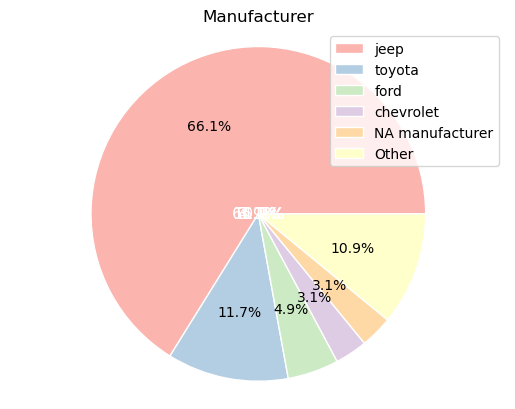

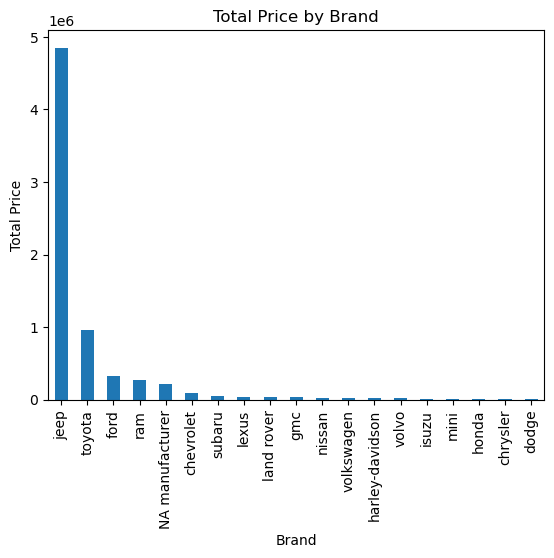

In [39]:
# Count the number of occurrences of each value in the 'manufacturer' column
colors_count = df_offroad['manufacturer'].value_counts()

# Get the count of top 5 manufacturers
top_5_count = colors_count.nlargest(5).values.tolist()

# Get the names of top 5 manufacturers
top_5_colors = colors_count.nlargest(5).index.tolist()

# Get the count of all manufacturers excluding top 5
other_count = colors_count.values.tolist()[5:]
other_count_sum = sum(other_count)

# Create a list of manufacturers including top 5 and other
all_colors_count = top_5_count + [other_count_sum]

# Create a list of manufacturer labels including top 5 and other
all_colors_labels = top_5_colors + ['Other']

# Create a pie chart of the 'manufacturer' column
wedges, labels, autopct = plt.pie(all_colors_count, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Add the percentage on the manufacturer of each wedge
for i, wedge in enumerate(wedges):
    # Calculate the percentage
    percentage = all_colors_count[i] / colors_count.sum() * 100
    # Set the color of the wedge to its label color
    if i < 5:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(i))
    else:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(5))
    # Add the percentage on the manufacturer of the wedge
    ax = plt.gca()
    ax.text(wedge.center[0], wedge.center[1], f'{percentage:.1f}%', fontsize=12, ha='center', va='center', color='white')

# Add a legend for all manufacturers
plt.legend(wedges, all_colors_labels, loc='best')

plt.title('Manufacturer')
plt.axis('equal')

# Create a DataFrame with the results
data = {'Color': all_colors_labels, 'Count': all_colors_count}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('offroad_manufacturer_results_number.csv', index=False)

plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'manufacturer' and calculate the sum of 'price'
color_prices = df_offroad.groupby('manufacturer')['price'].sum()

# Sort the 'manufacturers' Series in descending order
color_prices = color_prices.sort_values(ascending=False)

# Create a bar chart of the total price by 'manufacturer'
color_prices.plot(kind='bar', rot=0)

# Add labels and a title
plt.xlabel('Brand')
plt.ylabel('Total Price')
plt.title('Total Price by Brand')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Create a DataFrame with the results
data = {'manufacturer': color_prices.index.tolist(), 'Total Price': color_prices.values.tolist()}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('offroad_manufacturer_results_dollar.csv', index=False)

plt.show()


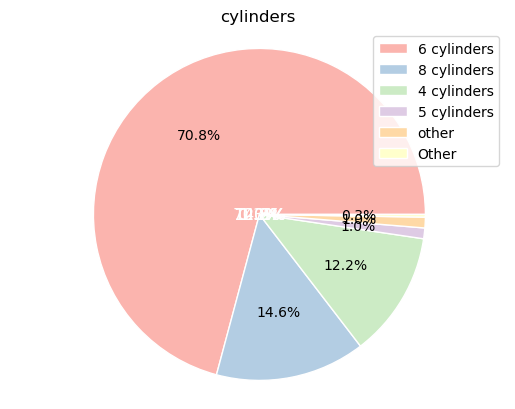

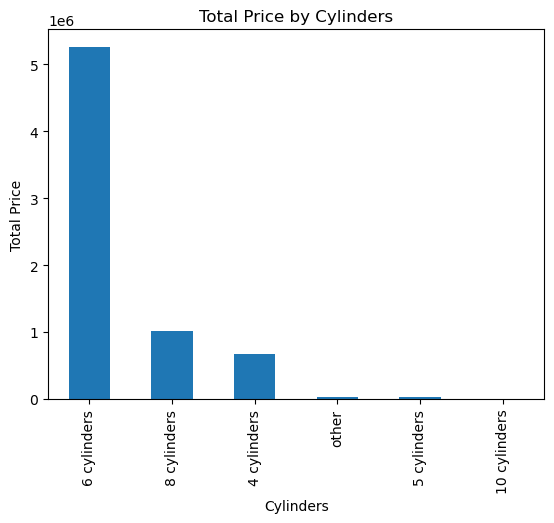

In [40]:
# Count the number of occurrences of each value in the 'cylinders' column
colors_count = df_offroad['cylinders'].value_counts()

# Get the count of top 5 cylinderss
top_5_count = colors_count.nlargest(5).values.tolist()

# Get the names of top 5 cylinderss
top_5_colors = colors_count.nlargest(5).index.tolist()

# Get the count of all cylinderss excluding top 5
other_count = colors_count.values.tolist()[5:]
other_count_sum = sum(other_count)

# Create a list of cylinderss including top 5 and other
all_colors_count = top_5_count + [other_count_sum]

# Create a list of cylinders labels including top 5 and other
all_colors_labels = top_5_colors + ['Other']

# Create a pie chart of the 'cylinders' column
wedges, labels, autopct = plt.pie(all_colors_count, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Add the percentage on the cylinders of each wedge
for i, wedge in enumerate(wedges):
    # Calculate the percentage
    percentage = all_colors_count[i] / colors_count.sum() * 100
    # Set the color of the wedge to its label color
    if i < 5:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(i))
    else:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(5))
    # Add the percentage on the cylinders of the wedge
    ax = plt.gca()
    ax.text(wedge.center[0], wedge.center[1], f'{percentage:.1f}%', fontsize=12, ha='center', va='center', color='white')

# Add a legend for all cylinderss
plt.legend(wedges, all_colors_labels, loc='best')

plt.title('cylinders')
plt.axis('equal')

# Create a DataFrame with the results
data = {'Color': all_colors_labels, 'Count': all_colors_count}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('offroad_cylinders_results_number.csv', index=False)

plt.show()

# Group the data by 'cylinders' and calculate the sum of 'price'
color_prices = df_offroad.groupby('cylinders')['price'].sum()

# Sort the 'cylinderss' Series in descending order
color_prices = color_prices.sort_values(ascending=False)

# Create a bar chart of the total price by 'cylinders'
color_prices.plot(kind='bar', rot=0)

# Add labels and a title
plt.xlabel('Cylinders')
plt.ylabel('Total Price')
plt.title('Total Price by Cylinders')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Create a DataFrame with the results
data = {'cylinders': color_prices.index.tolist(), 'Total Price': color_prices.values.tolist()}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('offroad_cylinders_results_dollar.csv', index=False)

plt.show()


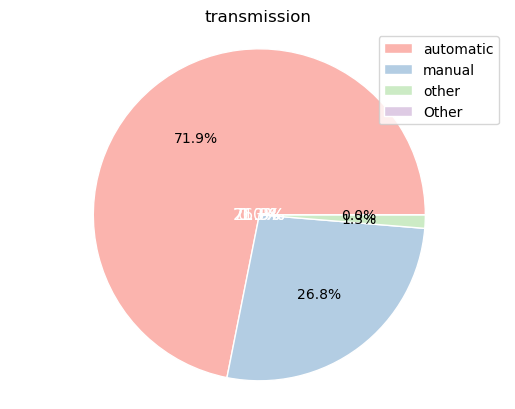

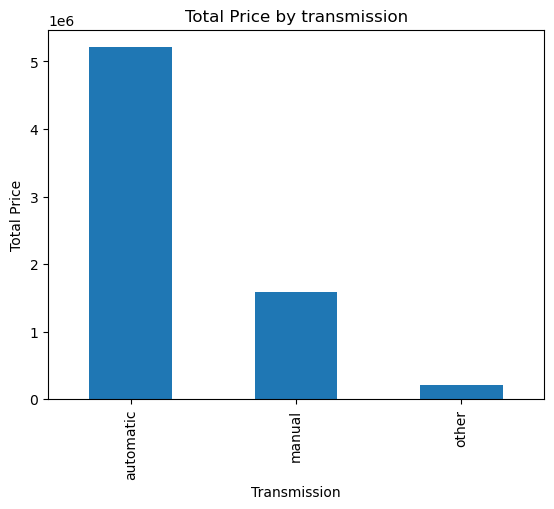

In [41]:
# Count the number of occurrences of each value in the 'transmission' column
colors_count = df_offroad['transmission'].value_counts()

# Get the count of top 5 transmissions
top_5_count = colors_count.nlargest(5).values.tolist()

# Get the names of top 5 transmissions
top_5_colors = colors_count.nlargest(5).index.tolist()

# Get the count of all transmissions excluding top 5
other_count = colors_count.values.tolist()[5:]
other_count_sum = sum(other_count)

# Create a list of transmissions including top 5 and other
all_colors_count = top_5_count + [other_count_sum]

# Create a list of transmission labels including top 5 and other
all_colors_labels = top_5_colors + ['Other']

# Create a pie chart of the 'transmission' column
wedges, labels, autopct = plt.pie(all_colors_count, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Add the percentage on the transmission of each wedge
for i, wedge in enumerate(wedges):
    # Calculate the percentage
    percentage = all_colors_count[i] / colors_count.sum() * 100
    # Set the color of the wedge to its label color
    if i < 5:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(i))
    else:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(5))
    # Add the percentage on the transmission of the wedge
    ax = plt.gca()
    ax.text(wedge.center[0], wedge.center[1], f'{percentage:.1f}%', fontsize=12, ha='center', va='center', color='white')

# Add a legend for all transmissions
plt.legend(wedges, all_colors_labels, loc='best')

plt.title('transmission')
plt.axis('equal')

# Create a DataFrame with the results
data = {'Color': all_colors_labels, 'Count': all_colors_count}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('offroad_transmission_results_number.csv', index=False)

plt.show()

# Group the data by 'transmission' and calculate the sum of 'price'
color_prices = df_offroad.groupby('transmission')['price'].sum()

# Sort the 'transmissions' Series in descending order
color_prices = color_prices.sort_values(ascending=False)

# Create a bar chart of the total price by 'transmission'
color_prices.plot(kind='bar', rot=0)

# Add labels and a title
plt.xlabel('Transmission')
plt.ylabel('Total Price')
plt.title('Total Price by transmission')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Create a DataFrame with the results
data = {'transmission': color_prices.index.tolist(), 'Total Price': color_prices.values.tolist()}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('offroad_transmission_results_dollar.csv', index=False)

plt.show()


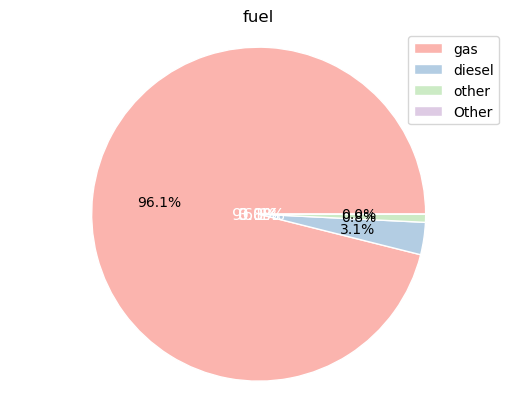

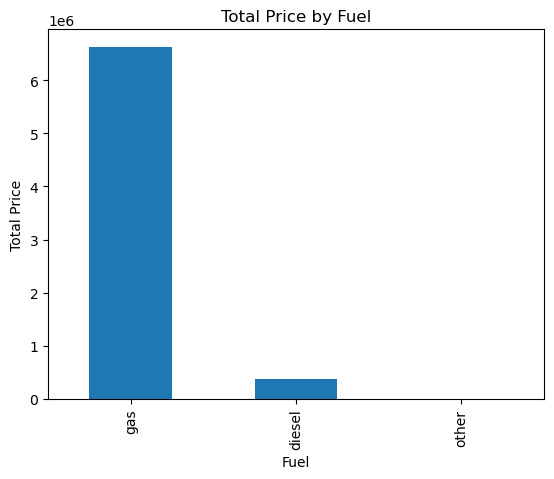

In [42]:
# Count the number of occurrences of each value in the 'fuel' column
colors_count = df_offroad['fuel'].value_counts()

# Get the count of top 5 fuels
top_5_count = colors_count.nlargest(5).values.tolist()

# Get the names of top 5 fuels
top_5_colors = colors_count.nlargest(5).index.tolist()

# Get the count of all fuels excluding top 5
other_count = colors_count.values.tolist()[5:]
other_count_sum = sum(other_count)

# Create a list of fuels including top 5 and other
all_colors_count = top_5_count + [other_count_sum]

# Create a list of fuel labels including top 5 and other
all_colors_labels = top_5_colors + ['Other']

# Create a pie chart of the 'fuel' column
wedges, labels, autopct = plt.pie(all_colors_count, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Add the percentage on the fuel of each wedge
for i, wedge in enumerate(wedges):
    # Calculate the percentage
    percentage = all_colors_count[i] / colors_count.sum() * 100
    # Set the color of the wedge to its label color
    if i < 5:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(i))
    else:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(5))
    # Add the percentage on the fuel of the wedge
    ax = plt.gca()
    ax.text(wedge.center[0], wedge.center[1], f'{percentage:.1f}%', fontsize=12, ha='center', va='center', color='white')

# Add a legend for all fuels
plt.legend(wedges, all_colors_labels, loc='best')

plt.title('fuel')
plt.axis('equal')

# Create a DataFrame with the results
data = {'Color': all_colors_labels, 'Count': all_colors_count}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('offroad_fuel_results_number.csv', index=False)

plt.show()

# Group the data by 'fuel' and calculate the sum of 'price'
color_prices = df_offroad.groupby('fuel')['price'].sum()

# Sort the 'fuels' Series in descending order
color_prices = color_prices.sort_values(ascending=False)

# Create a bar chart of the total price by 'fuel'
color_prices.plot(kind='bar', rot=0)

# Add labels and a title
plt.xlabel('Fuel')
plt.ylabel('Total Price')
plt.title('Total Price by Fuel')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Create a DataFrame with the results
data = {'fuel': color_prices.index.tolist(), 'Total Price': color_prices.values.tolist()}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('offroad_fuel_results_dollar.csv', index=False)

plt.show()


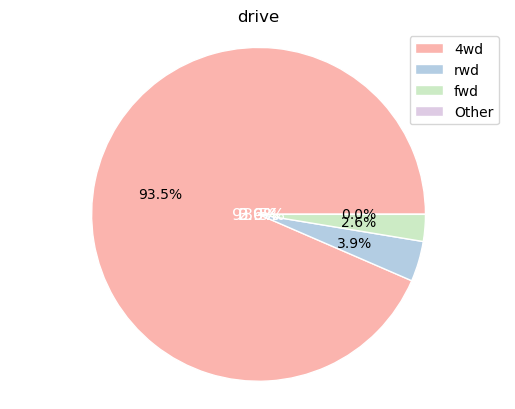

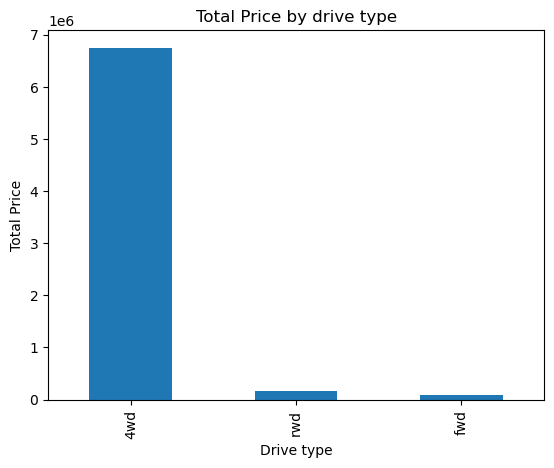

In [43]:
# Count the number of occurrences of each value in the 'drive' column
colors_count = df_offroad['drive'].value_counts()

# Get the count of top 5 drives
top_5_count = colors_count.nlargest(5).values.tolist()

# Get the names of top 5 drives
top_5_colors = colors_count.nlargest(5).index.tolist()

# Get the count of all drives excluding top 5
other_count = colors_count.values.tolist()[5:]
other_count_sum = sum(other_count)

# Create a list of drives including top 5 and other
all_colors_count = top_5_count + [other_count_sum]

# Create a list of drive labels including top 5 and other
all_colors_labels = top_5_colors + ['Other']

# Create a pie chart of the 'drive' column
wedges, labels, autopct = plt.pie(all_colors_count, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Add the percentage on the drive of each wedge
for i, wedge in enumerate(wedges):
    # Calculate the percentage
    percentage = all_colors_count[i] / colors_count.sum() * 100
    # Set the color of the wedge to its label color
    if i < 5:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(i))
    else:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(5))
    # Add the percentage on the drive of the wedge
    ax = plt.gca()
    ax.text(wedge.center[0], wedge.center[1], f'{percentage:.1f}%', fontsize=12, ha='center', va='center', color='white')

# Add a legend for all drives
plt.legend(wedges, all_colors_labels, loc='best')

plt.title('drive')
plt.axis('equal')

# Create a DataFrame with the results
data = {'Color': all_colors_labels, 'Count': all_colors_count}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('offroad_drive_results_number.csv', index=False)

plt.show()

# Group the data by 'drive' and calculate the sum of 'price'
color_prices = df_offroad.groupby('drive')['price'].sum()

# Sort the 'drives' Series in descending order
color_prices = color_prices.sort_values(ascending=False)

# Create a bar chart of the total price by 'drive'
color_prices.plot(kind='bar', rot=0)

# Add labels and a title
plt.xlabel('Drive type')
plt.ylabel('Total Price')
plt.title('Total Price by drive type')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Create a DataFrame with the results
data = {'drive': color_prices.index.tolist(), 'Total Price': color_prices.values.tolist()}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('offroad_drive_results_dollar.csv', index=False)

plt.show()


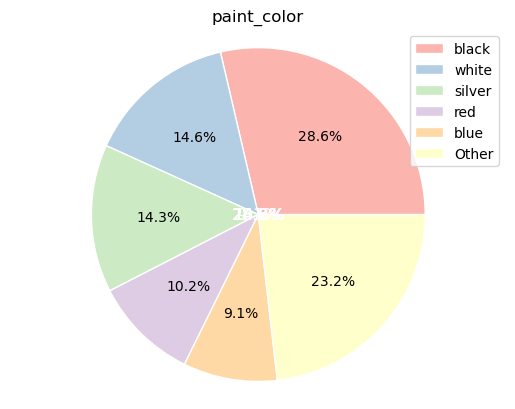

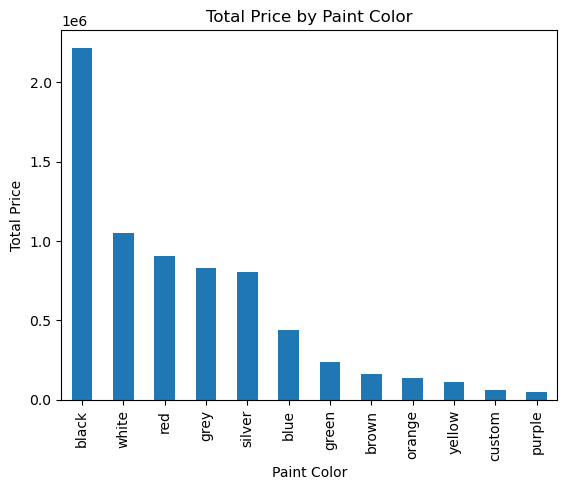

In [44]:
# Count the number of occurrences of each value in the 'paint_color' column
colors_count = df_offroad['paint_color'].value_counts()

# Get the count of top 5 paint_colors
top_5_count = colors_count.nlargest(5).values.tolist()

# Get the names of top 5 paint_colors
top_5_colors = colors_count.nlargest(5).index.tolist()

# Get the count of all paint_colors excluding top 5
other_count = colors_count.values.tolist()[5:]
other_count_sum = sum(other_count)

# Create a list of paint_colors including top 5 and other
all_colors_count = top_5_count + [other_count_sum]

# Create a list of paint_color labels including top 5 and other
all_colors_labels = top_5_colors + ['Other']

# Create a pie chart of the 'paint_color' column
wedges, labels, autopct = plt.pie(all_colors_count, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Add the percentage on the paint_color of each wedge
for i, wedge in enumerate(wedges):
    # Calculate the percentage
    percentage = all_colors_count[i] / colors_count.sum() * 100
    # Set the color of the wedge to its label color
    if i < 5:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(i))
    else:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(5))
    # Add the percentage on the paint_color of the wedge
    ax = plt.gca()
    ax.text(wedge.center[0], wedge.center[1], f'{percentage:.1f}%', fontsize=12, ha='center', va='center', color='white')

# Add a legend for all paint_colors
plt.legend(wedges, all_colors_labels, loc='best')

plt.title('paint_color')
plt.axis('equal')

# Create a DataFrame with the results
data = {'Color': all_colors_labels, 'Count': all_colors_count}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('offroad_paint_color_results_number.csv', index=False)

plt.show()

# Group the data by 'paint_color' and calculate the sum of 'price'
color_prices = df_offroad.groupby('paint_color')['price'].sum()

# Sort the 'paint_colors' Series in descending order
color_prices = color_prices.sort_values(ascending=False)

# Create a bar chart of the total price by 'paint_color'
color_prices.plot(kind='bar', rot=0)

# Add labels and a title
plt.xlabel('Paint Color')
plt.ylabel('Total Price')
plt.title('Total Price by Paint Color')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Create a DataFrame with the results
data = {'paint_color': color_prices.index.tolist(), 'Total Price': color_prices.values.tolist()}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('offroad_paint_color_results_dollar.csv', index=False)

plt.show()


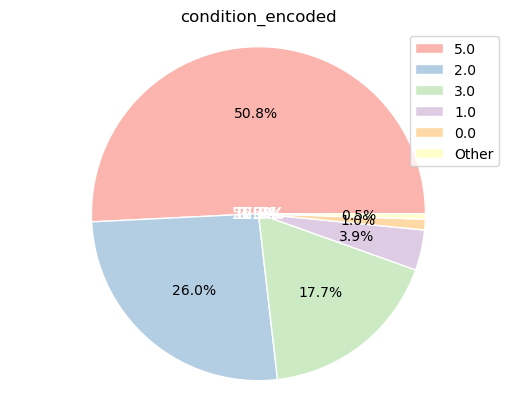

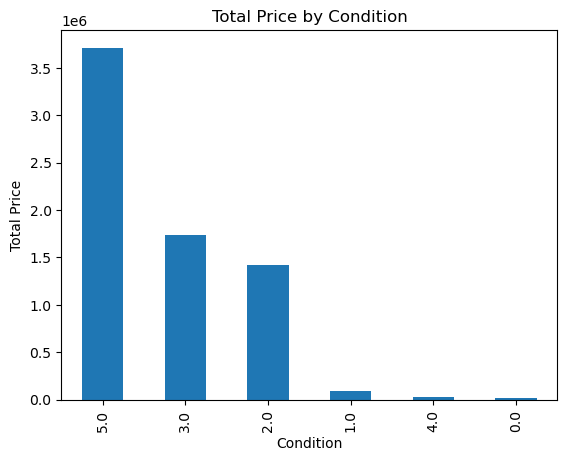

In [46]:
# Count the number of occurrences of each value in the 'condition_encoded' column
colors_count = df_offroad['condition_encoded'].value_counts()

# Get the count of top 5 condition_encodeds
top_5_count = colors_count.nlargest(5).values.tolist()

# Get the names of top 5 condition_encodeds
top_5_colors = colors_count.nlargest(5).index.tolist()

# Get the count of all condition_encodeds excluding top 5
other_count = colors_count.values.tolist()[5:]
other_count_sum = sum(other_count)

# Create a list of condition_encodeds including top 5 and other
all_colors_count = top_5_count + [other_count_sum]

# Create a list of condition_encoded labels including top 5 and other
all_colors_labels = top_5_colors + ['Other']

# Create a pie chart of the 'condition_encoded' column
wedges, labels, autopct = plt.pie(all_colors_count, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Add the percentage on the condition_encoded of each wedge
for i, wedge in enumerate(wedges):
    # Calculate the percentage
    percentage = all_colors_count[i] / colors_count.sum() * 100
    # Set the color of the wedge to its label color
    if i < 5:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(i))
    else:
        wedge.set_facecolor(plt.get_cmap('Pastel1')(5))
    # Add the percentage on the condition_encoded of the wedge
    ax = plt.gca()
    ax.text(wedge.center[0], wedge.center[1], f'{percentage:.1f}%', fontsize=12, ha='center', va='center', color='white')

# Add a legend for all condition_encodeds
plt.legend(wedges, all_colors_labels, loc='best')

plt.title('condition_encoded')
plt.axis('equal')

# Create a DataFrame with the results
data = {'Color': all_colors_labels, 'Count': all_colors_count}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('offroad_condition_encoded_results_number.csv', index=False)

plt.show()

# Group the data by 'condition_encoded' and calculate the sum of 'price'
color_prices = df_offroad.groupby('condition_encoded')['price'].sum()

# Sort the 'condition_encodeds' Series in descending order
color_prices = color_prices.sort_values(ascending=False)

# Create a bar chart of the total price by 'condition_encoded'
color_prices.plot(kind='bar', rot=0)

# Add labels and a title
plt.xlabel('Condition')
plt.ylabel('Total Price')
plt.title('Total Price by Condition')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Create a DataFrame with the results
data = {'condition_encoded': color_prices.index.tolist(), 'Total Price': color_prices.values.tolist()}
df_results = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_results.to_csv('offroad_condition_encoded_results_dollar.csv', index=False)

plt.show()
